# Ice Task
This task involved creating a CNN for image classification to predict a photo of Nicolas Cage. I built my dataset by looking at repositories of Nicolas Cage photos as well as repositories for other celeb faces as linked below.
https://www.kaggle.com/datasets/vishesh1412/celebrity-face-image-dataset?resource=download
https://github.com/DrewScatterday/Nicolas_Cage

A tutorial was also used as a guide: https://medium.com/@sssspppp/image-classification-using-cnn-0fad8367acfd


A Convolutional Neural Network (CNN) is a specialized deep learning architecture designed for processing grid-like data, particularly images. CNNs uses a series of convolutional layers that apply filters to the input data, enabling the model to automatically learn spatial hierarchies of features, such as edges, textures, and patterns. These layers are typically followed by activation functions like ReLU and pooling layers that downsample the feature maps, reducing dimensionality while retaining important information. After several convolutional and pooling operations, the output is flattened and passed through fully connected layers to produce the final predictions, such as class labels in image classification tasks. CNNs are widely used in various applications, including image recognition, object detection, and medical image analysis, due to their efficiency in handling large datasets and their ability to capture complex patterns in visual data (Krizhevsky et al., 2012).


Krizhevsky, A., Sutskever, I. and Hinton, G. E. (2012) 'Imagenet classification with deep convolutional neural networks', Advances in neural information processing systems, 25. [Online].



In [1]:
import cv2
import tensorflow as tf
import os
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

This code loads an image dataset from the 'data' directory, resizes the images to 256x256 pixels, and processes them in batches of 32. It retrieves the first batch of images and labels, and then uses Matplotlib to display the first 9 images in a 3x3 grid, converting the images to NumPy arrays for visualization. The labels are shown as titles for each image, and the axes are hidden for a cleaner display.

Found 402 files belonging to 2 classes.


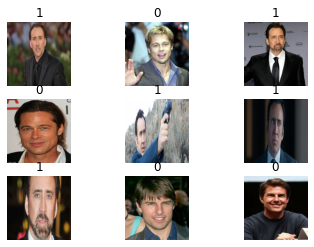

In [2]:
 # Update this path to your dataset directory

# Load the entire dataset
full_dataset = tf.keras.utils.image_dataset_from_directory('data', image_size=(256, 256), batch_size=32)
# Get a batch of images and labels
for images, labels in full_dataset.take(1):  # Taking only the first batch
    plt.figure()
    
    for i in range(9):  # Display the first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert tensor to numpy array
        plt.title(int(labels[i]))  # Display label
        plt.axis("off")  # Hide axes

plt.show()

In [3]:
# Convert the dataset to numpy arrays
image_batches = []
labels_batches = []

for images, labels in full_dataset:
    image_batches.append(images.numpy())
    labels_batches.append(labels.numpy())

# Concatenate the arrays
full_images = np.concatenate(image_batches)
full_labels = np.concatenate(labels_batches)




In [4]:
class_counts = np.unique(full_labels, return_counts=True)
print(f'Class labels: {class_counts[0]}')
print(f'Counts per class: {class_counts[1]}')

Class labels: [0 1]
Counts per class: [200 202]


In [5]:
# Split into training, validation, and test sets
train_images, temp_images, train_labels, temp_labels = train_test_split(
    full_images, full_labels, test_size=0.3, random_state=123)  # 70% training data

val_images, test_images, val_labels, test_labels = train_test_split(
    temp_images, temp_labels, test_size=0.5, random_state=123)  # 15% validation, 15% test

In [6]:
import tensorflow as tf

# Function to apply data augmentation
def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    return image, label

# Create datasets from tensors
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
val_data = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
test_data = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# Apply augmentation only to training data
train_data = train_data.map(augment_image).batch(32)
val_data = val_data.batch(32)  # No augmentation for validation
test_data = test_data.batch(32)  # No augmentation for test


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# Initialize a Sequential model
model = Sequential()

# Use an Input layer to specify the shape of the input data
model.add(Input(shape=(256, 256, 3)))  # Input layer defining the shape of the input images

# Add Convolutional and MaxPooling layers with different kernel sizes
model.add(Conv2D(32, (5, 5), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the data before the fully connected layers
model.add(Flatten())

# Add fully connected (Dense) layers
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output layer with 1 unit (sigmoid for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
#optimizer = Adam(learning_rate=1e-4)  # You can tune the learning rate
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show a summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 252, 252, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 252, 252, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 124, 124, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,083,009 (99.50 MB)

 Trainable params: 26,082,049 (99.50 MB)

 Non-trainable params: 960 (3.75 KB)

In [8]:
#Set up EarlyStopping and ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [9]:
# Fit the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stopping]
    #callbacks=[early_stopping, lr_scheduler]
)



Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5352 - loss: 24.5930 - val_accuracy: 0.4500 - val_loss: 64.8959
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6804 - loss: 21.6053 - val_accuracy: 0.4667 - val_loss: 122.8401
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6880 - loss: 21.1210 - val_accuracy: 0.4833 - val_loss: 49.0984
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7658 - loss: 20.3658 - val_accuracy: 0.5333 - val_loss: 40.3319
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7541 - loss: 19.2368 - val_accuracy: 0.5333 - val_loss: 27.8381
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8170 - loss: 16.5442 - val_accuracy: 0.5167 - val_loss: 26.4789
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8468 - loss: 15.6205 - val_accuracy: 0.4667 - val_loss: 34.0565
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8927 - loss: 14.3536 - val_accuracy: 0.5833 - val_loss:

Ideally the training accuracy increases and stabilizes, while the validation accuracy also increases and approaches the training accuracy. Additionally the training loss decreases steadily, while the validation loss decreases initially and then stabilizes at a low value, lose to the training loss. The graphs as seen can be described as leaning towards this ideal situation

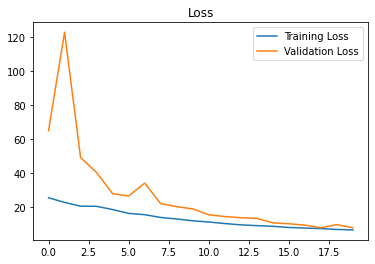

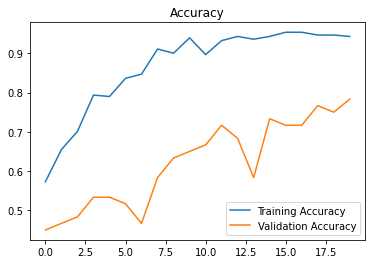

In [12]:
# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()


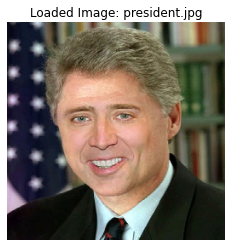

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
president.jpg: This is Nicolas Cage!


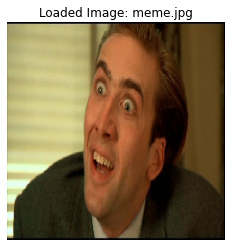

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
meme.jpg: This is Nicolas Cage!


In [13]:
from tensorflow.keras.preprocessing import image
image_paths = ['president.jpg', 'meme.jpg']  # Update with your images

# Iterate over the list of image paths
for img_path in image_paths:
    # Load the image and resize it to the target size
    img = image.load_img(img_path, target_size=(256, 256))
    
    # Convert to array and normalize
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Display the image
    plt.imshow(img_array[0])  # Use the first image in the batch (since we added a batch dimension)
    plt.axis('off')  # Hide the axes
    plt.title(f'Loaded Image: {img_path}')  # Add a title with the image filename
    plt.show()
    
        # Make a prediction
    prediction = model.predict(img_array)
    
    # Interpret the prediction
    if prediction > 0.5:
        print(f"{img_path}: This is Nicolas Cage!")
    else:
        print(f"{img_path}: This is not Nicolas Cage!")
